<h1>Empirical estimation of $f$-divergences<span class="tocSkip"></span></h1>

Author: [Sylvain Combettes](https://github.com/sylvaincom).

Last update: Jan 29, 2020.

---
This notebook deals with the empirical estimation of $f$-divergences and completes my report on the _Comparison of empirical probability distributions_. Three $f$-divergences are dealt with: Kullback-Leibler divergence, Helligence distance and Variational distance. As IPMs (integral probability metrics) work on samples drawn from the probability distributions, 𝑓-divergences work on probability distributions.

<br/>

<div class="alert alert-info"><h4>README<span class="tocSkip"></span></h4><p>
The best way to open this Jupyter Notebook is to use the table of contents from the extensions called <code>nbextensions</code>. See <a href="https://towardsdatascience.com/4-awesome-tips-for-enhancing-jupyter-notebooks-4d8905f926c5">4 Awesome Tips for Enhancing Jupyter Notebooks</a> by George Seif.
    
The Python version is 3.7.3.
</p></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KL-divergence" data-toc-modified-id="KL-divergence-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KL divergence</a></span><ul class="toc-item"><li><span><a href="#Defining-our-generic-function" data-toc-modified-id="Defining-our-generic-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Defining our generic function</a></span></li><li><span><a href="#Running-several-simulations-to-interpret-$D_{\text{KL}}$" data-toc-modified-id="Running-several-simulations-to-interpret-$D_{\text{KL}}$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Running several simulations to interpret $D_{\text{KL}}$</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-normal-distributions" data-toc-modified-id="Comparing-two-normal-distributions-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Comparing two normal distributions</a></span><ul class="toc-item"><li><span><a href="#Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_\text{KL}$" data-toc-modified-id="Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_\text{KL}$-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Influence of the difference of means $\mu_q-\mu_p$ on $D_\text{KL}$</a></span></li><li><span><a href="#Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_\text{KL}$" data-toc-modified-id="Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_\text{KL}$-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_\text{KL}$</a></span></li></ul></li><li><span><a href="#Comparison-of-two-uniform-distributions" data-toc-modified-id="Comparison-of-two-uniform-distributions-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Comparison of two uniform distributions</a></span></li></ul></li></ul></li><li><span><a href="#Hellinger-distance" data-toc-modified-id="Hellinger-distance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hellinger distance</a></span><ul class="toc-item"><li><span><a href="#Defining-our-generic-function" data-toc-modified-id="Defining-our-generic-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Defining our generic function</a></span></li><li><span><a href="#Running-several-simulations-to-interpret-$D_H$" data-toc-modified-id="Running-several-simulations-to-interpret-$D_H$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Running several simulations to interpret $D_H$</a></span><ul class="toc-item"><li><span><a href="#Comparing-two-normal-distributions" data-toc-modified-id="Comparing-two-normal-distributions-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Comparing two normal distributions</a></span><ul class="toc-item"><li><span><a href="#Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_H$" data-toc-modified-id="Influence-of-the-difference-of-means-$\mu_q-\mu_p$-on-$D_H$-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Influence of the difference of means $\mu_q-\mu_p$ on $D_H$</a></span></li><li><span><a href="#Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_H$" data-toc-modified-id="Influence-of-the-difference-of-standard-deviations-$\sigma_q-\sigma_p$-on-$D_H$-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_H$</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Variational-distance" data-toc-modified-id="Variational-distance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Variational distance</a></span></li><li><span><a href="#Application-to-the-Choquet-integral" data-toc-modified-id="Application-to-the-Choquet-integral-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Application to the Choquet integral</a></span><ul class="toc-item"><li><span><a href="#Normal-distributions" data-toc-modified-id="Normal-distributions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Normal distributions</a></span></li></ul></li></ul></div>

<h2> Imports<span class="tocSkip"></span></h2>

In [1]:
import numpy as np
from scipy.stats import norm, uniform
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import seaborn as sns
sns.set()

We configure the size of the plots:

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

# KL divergence

This section is inspired from [KL Divergence Python Example](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810).

## Defining our generic function

We define our `kl_divergence` function using functions from `numpy`. We are careful with the result $\lim\limits_{x \rightarrow 0} \log(x) = -\infty$.

In [3]:
def kl_divergence(p, q):
    """
    Kullback-Leibler divergence of two (empirical) probability distributions.
    
    Parameters
    ----------
    p : numpy.ndarray
        Vector of the values of the first (discrete) probability distribution.
    q : numpy.ndarray
        Vector of the values of the second (discrete) probability distribution.
    
    Returns
    -------
    res : numpy.float64
        Result of the computation of the Kullback-Leibler divergence of p from q.
    """
    
    res = np.sum(np.where(p!=0, p*np.log(p/q), 0))
    
    return res

## Running several simulations to interpret $D_{\text{KL}}$

### Comparing two normal distributions

Here we consider two normal distributions $\mathbb{P} = \mathcal{N}(\mu_p, \sigma_p)$ and $\mathbb{Q} = \mathcal{N}(\mu_q, \sigma_q)$.

Now, we are going to plot two normal distributions using [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and compute their KL divergence, for several values of mean and standard deviation. The goal is to see if the interpretation of the KL divergence corresponds to our intuition.

We define a plotting function:

In [4]:
def plot_normal_divergence(m_p, sd_p, m_q, sd_q, f_divergence):
    """
    Plotting two normal distributions and computing their f-divergence.
    
    Parameters
    ----------
    m_p : float
        Mean of the normal distribution p.
    sd_p : float
        Standard deviation of the normal distribution p.
    m_q : float
        Mean of the normal distribution p.
    sd_q : float
        Standard deviation distribution p.
    f_divergence : {kl_divergence, hellinger_distance, varational_distance}
        Function that computes the f-divergence we choose.
        
    Plots
    -------
    Plots (on the same figure) the two normal distributions and their f-divergence in the title.
    """
    
    x = np.arange(-10, 10, 0.001) # x-axis of our plot
    p = norm.pdf(x, m_p, sd_p) # first normal distribution of mean m_p and standard deviation sd_p
    q = norm.pdf(x, m_q, sd_q) # second normal distribution of mean m_q and standard deviation sd_q
    
    plt.title('The %s of $p$ from $q$ is %1.3f \n (with $p$ and $q$ normal distributions)'
              % (f_divergence.__name__, f_divergence(p, q)))
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    txt1 = '$\mu_p = %1.1f$ and $\sigma_p = %1.0f$' % (m_p, sd_p)
    txt2 = '$\mu_q = %1.1f$ and $\sigma_q = %1.0f$' % (m_q, sd_q)
    plt.legend([txt1, txt2])
    plt.show()

We call our plotting function:

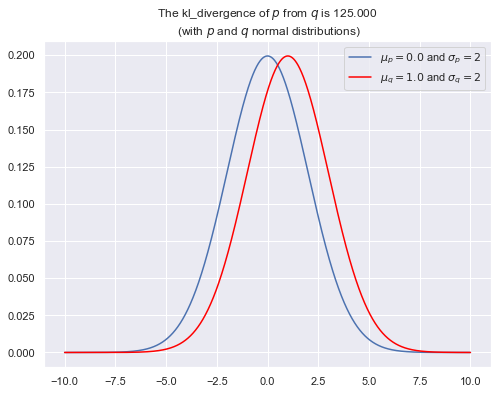

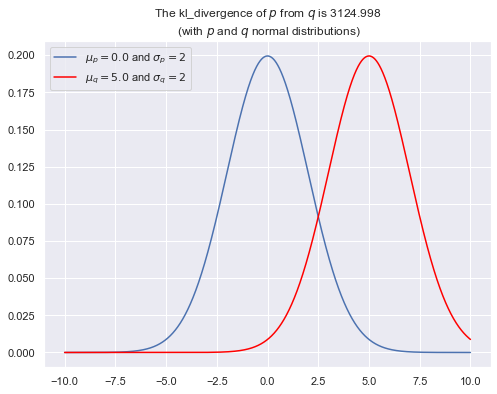

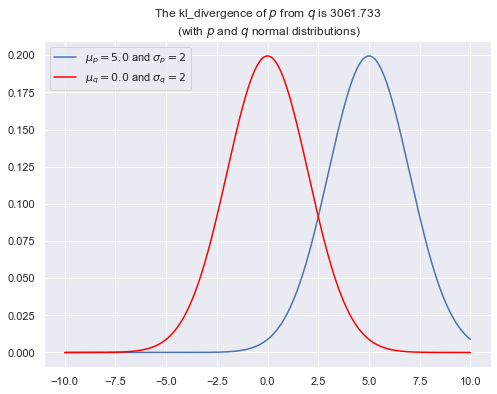

In [5]:
plot_normal_divergence(0, 2, 1, 2, kl_divergence)
plot_normal_divergence(0, 2, 5, 2, kl_divergence)
plot_normal_divergence(5, 2, 0, 2, kl_divergence)

Hence, the lower the KL divergence, the closer the two distributions are to one another.

It is important to note that the KL divergence is not symmetrical. In other words, if we switch `p` for `q` and vice versa, we get a different result.

#### Influence of the difference of means $\mu_q-\mu_p$ on $D_\text{KL}$

In [6]:
l_KL_mu = []
l_diff_mu = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for mu_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_mu.append([mu_q-mu_p])
    l_KL_mu.append([kl_divergence(p, q)])

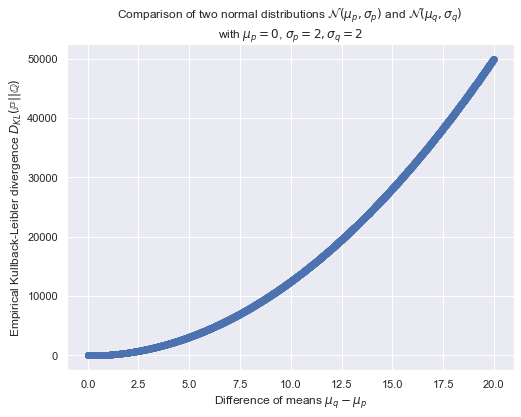

In [7]:
txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Kullback-Leibler divergence $D_{KL}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_mu, l_KL_mu, 'o') ;
plt.savefig('KL_diff_mu.png', dpi=120) # to save the figure

In [8]:
reg = LinearRegression()
X = np.power(np.asarray(l_diff_mu), 2)
y = np.asarray(l_KL_mu)

reg.fit(X, y)
print('The regression score is: \n', reg.score(X, y))
print('The regression coefficients are: \n', reg.coef_)
print('The regression intercept is: \n', reg.intercept_)

The regression score is: 
 1.0
The regression coefficients are: 
 [[124.99992842]]
The regression intercept is: 
 [6.96334246e-06]


#### Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_\text{KL}$

In [9]:
l_KL_sigma = []
l_diff_sigma = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

mu_q = 0
n_q = n_p

l_abs = np.arange(2, 40, 0.01)
for sigma_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_sigma.append([sigma_q-sigma_p])
    l_KL_sigma.append([kl_divergence(p, q)])

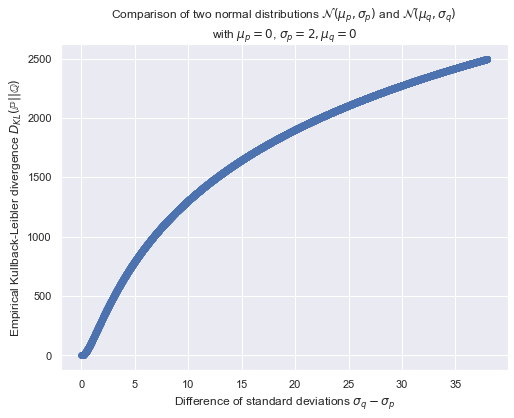

In [10]:
txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\mu_q = %1.0f$' % (mu_q)
plt.title(txt)
plt.xlabel('Difference of standard deviations $\sigma_q-\sigma_p$')
plt.ylabel('Empirical Kullback-Leibler divergence $D_{KL}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_sigma, l_KL_sigma, 'o') ;
plt.savefig('KL_diff_sigma.png', dpi=120) # to save the figure

In [11]:
reg = LinearRegression()
X = np.power(np.asarray(l_diff_sigma), 1/2)
y = np.asarray(l_KL_sigma)

reg.fit(X, y)
print('The regression score is: \n', reg.score(X, y))
print('The regression coefficients are: \n', reg.coef_)
print('The regression intercept is: \n', reg.intercept_)

The regression score is: 
 0.9902971945211432
The regression coefficients are: 
 [[454.79371984]]
The regression intercept is: 
 [-190.57320307]


### Comparison of two uniform distributions

Here we consider two normal distributions $\mathbb{P} = \mathbb{U}\left([a, a+h]\right)$ and $\mathbb{Q} = \mathbb{U}\left([r, r+h]\right)$ where $h$ is the length of the intervals.

Note: $a$ is called the **interval start** of $[a, a+h]$.

[doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

In [12]:
l_KL_unif = []
l_diff_unif = []

x = np.arange(1, 20, 0.001) # x-axis of our plot

h = 2
a = 3
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = uniform.pdf(x, a, a+h) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(1, 20, 0.01)
for r in l_abs:
    q = uniform.pdf(x, r, r+h)
    l_diff_unif.append([r-a])
    l_KL_unif.append([kl_divergence(p+1, q+1)]) # +1 so the values of p and q are strictly positive

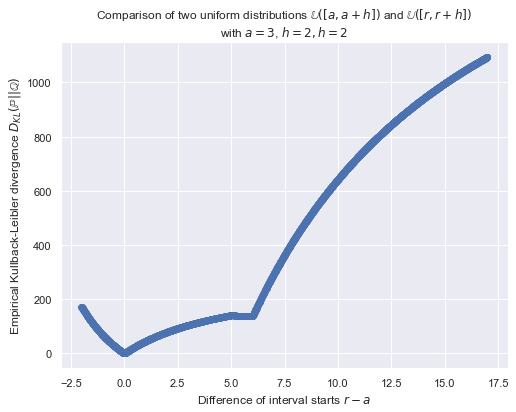

In [13]:
txt = 'Comparison of two uniform distributions $\mathbb{U}([a, a+h])$ and $\mathbb{U}([r, r+h])$ \n'
txt = txt + 'with $a = %1.0f$, $h = %1.0f, $' % (a, h)
txt = txt + '$h = %1.0f$' % (h)
plt.title(txt)
plt.xlabel('Difference of interval starts $r-a$')
plt.ylabel('Empirical Kullback-Leibler divergence $D_{KL}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_unif, l_KL_unif, 'o') ;
plt.savefig('W_diff_unif.png', dpi=120) # to save the figure

# Hellinger distance

## Defining our generic function

In [14]:
def hellinger_distance(p, q):
    return np.sum((np.sqrt(p)-np.sqrt(q))**2)

## Running several simulations to interpret $D_H$

### Comparing two normal distributions

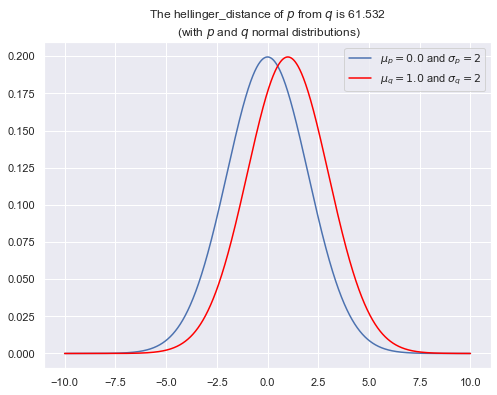

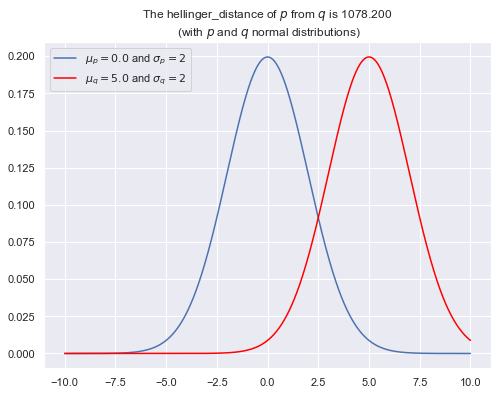

In [15]:
plot_normal_divergence(0, 2, 1, 2, hellinger_distance)
plot_normal_divergence(0, 2, 5, 2, hellinger_distance)

#### Influence of the difference of means $\mu_q-\mu_p$ on $D_H$

In [16]:
l_HD_mu = []
l_diff_mu = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

sigma_q = 2
n_q = n_p

l_abs = np.arange(0, 20, 0.01)
for mu_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_mu.append([mu_q-mu_p])
    l_HD_mu.append([hellinger_distance(p, q)])

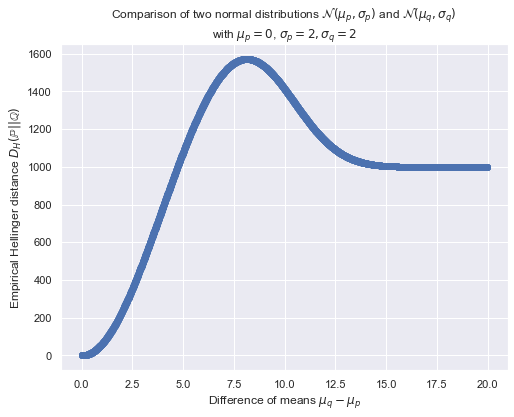

In [17]:
txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Hellinger distance $D_{H}(\mathbb{P} || \mathbb{Q})$')
plt.plot(l_diff_mu, l_HD_mu, 'o') ;
plt.savefig('HD_diff_mu.png', dpi=120) # to save the figure

[doc](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)

/home/swc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.68602e-21): result may not be accurate.
  overwrite_a=True).T


The polynomial interpolation score is: 
 0.9992706975162684


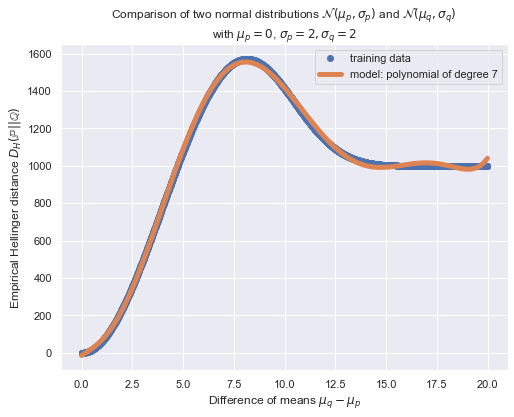

In [18]:
degree = 7
reg = make_pipeline(PolynomialFeatures(degree), Ridge())
X = np.asarray(l_diff_mu)
y = np.asarray(l_HD_mu)

reg.fit(X, y)
print('The polynomial interpolation score is: \n', reg.score(X, y))
# print('The regression coefficients are: \n', reg.coef_)
# print('The regression intercept is: \n', reg.intercept_)

y_pred = reg.predict(X)

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\sigma_q = %1.0f$' % (sigma_q)
plt.title(txt)
plt.xlabel('Difference of means $\mu_q-\mu_p$')
plt.ylabel('Empirical Hellinger distance $D_{H}(\mathbb{P} || \mathbb{Q})$')
plt.plot(X, y, 'o', X, y_pred, linewidth=5) ;
plt.legend(["training data", "model: polynomial of degree %d" % degree]) ;
plt.savefig('HD_diff_mu_reg.png', dpi=120) # to save the figure

#### Influence of the difference of standard deviations $\sigma_q-\sigma_p$ on $D_H$

In [19]:
l_HD_sigma = []
l_diff_sigma = []

x = np.arange(-10, 10, 0.001) # x-axis of our plot

mu_p = 0
sigma_p = 2
n_p = 30 # after several simulations, 30 seems enough
p = norm.pdf(x, mu_p, sigma_p) # first normal distribution of mean m_p and standard deviation sd_p

mu_q = 0
n_q = n_p

l_abs = np.arange(2, 40, 0.01)
for sigma_q in l_abs:
    q = norm.pdf(x, mu_q, sigma_q)
    l_diff_sigma.append([sigma_q-sigma_p])
    l_HD_sigma.append([hellinger_distance(p, q)])

/home/swc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00226e-22): result may not be accurate.
  overwrite_a=True).T


The polynomial interpolation score is: 
 0.9979918191859164


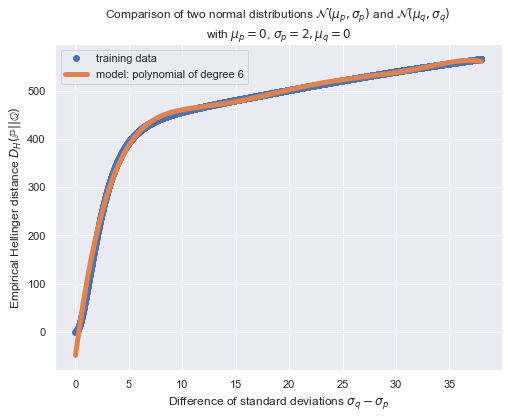

In [20]:
degree = 6
reg = make_pipeline(PolynomialFeatures(degree), Ridge())
X = np.asarray(l_diff_sigma)
y = np.asarray(l_HD_sigma)

reg.fit(X, y)
print('The polynomial interpolation score is: \n', reg.score(X, y))
# print('The regression coefficients are: \n', reg.coef_)
# print('The regression intercept is: \n', reg.intercept_)

y_pred = reg.predict(X)

txt = 'Comparison of two normal distributions $\mathcal{N}(\mu_p, \sigma_p)$ and $\mathcal{N}(\mu_q, \sigma_q)$ \n'
txt = txt + 'with $\mu_p = %1.0f$, $\sigma_p = %1.0f, $' % (mu_p, sigma_p)
txt = txt + '$\mu_q = %1.0f$' % (mu_q)
plt.title(txt)
plt.xlabel('Difference of standard deviations $\sigma_q-\sigma_p$')
plt.ylabel('Empirical Hellinger distance $D_{H}(\mathbb{P} || \mathbb{Q})$')
plt.plot(X, y, 'o', X, y_pred, linewidth=5) ;
plt.legend(["training data", "model: polynomial of degree %d" % degree]) ;
plt.savefig('HD_diff_sigma_reg.png', dpi=120) # to save the figure

# Variational distance

In [21]:
def variational_distance(p, q):
    return np.sum(np.abs(p-q))

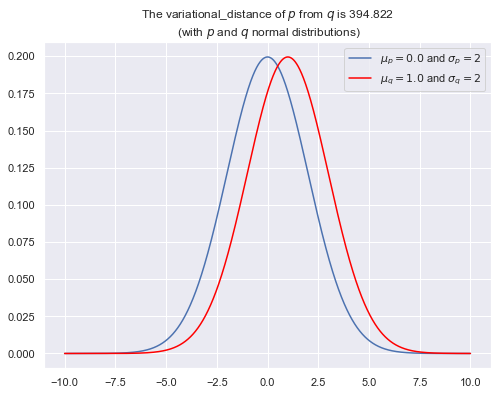

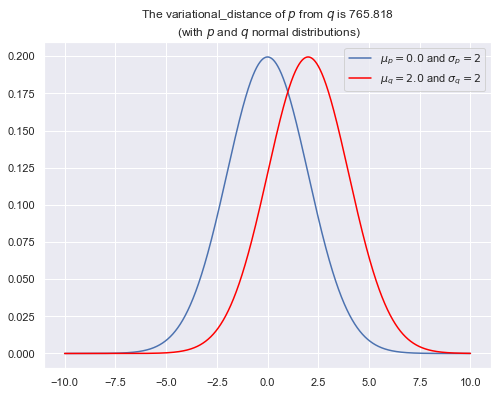

In [22]:
plot_normal_divergence(0, 2, 1, 2, variational_distance)
plot_normal_divergence(0, 2, 2, 2, variational_distance)

# Application to the Choquet integral

## Normal distributions

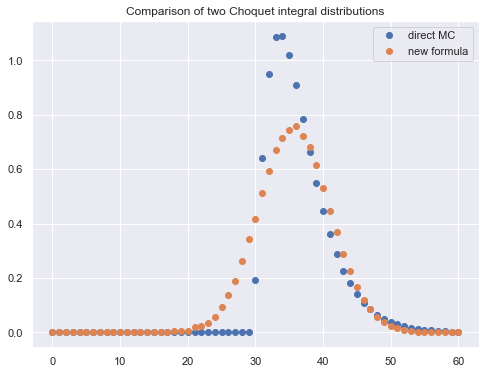

In [32]:
P1_df = pd.read_csv('P1.csv', sep=',', header=None)
P2_df = pd.read_csv('P2.csv', sep=',', header=None)

P1_array = P1_df.values[0]
P2_array = P2_df.values[0]

P1_list = P1_df.values.tolist()[0]
P2_list = P2_df.values.tolist()[0]

plt.title('Comparison of two Choquet integral distributions')
plt.plot(P1_list, 'o') ;
plt.plot(P2_list, 'o') ;
plt.legend(['direct MC', 'new formula']) ;

In [24]:
kl_divergence(P1_array, P2_array)

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


1.7270266857631373

Does the 0 values change the computation ? No. Indeed:

In [25]:
test1 = np.array([0, 0, 0, 0, 10, 20, 30, 40, 50, 60, 70, 70, 80])
test2 = np.array([0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 7, 8])
kl_divergence(test1, test2)

/home/swc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


990.1115899874397

In [26]:
test1 = np.array([10, 20, 30, 40, 50, 60, 70, 70, 80])
test2 = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8])
kl_divergence(test1, test2)

990.1115899874397

In [27]:
variational_distance(P1_array, P2_array)

3.7545900000000003

In [28]:
hellinger_distance(P1_array, P2_array)

1.4363148627737907